Following <https://scikit-learn.org/stable/modules/linear_model.html>

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoLars
from sklearn.metrics import mean_squared_error

def fit(reg, Xy):
  x = Xy['X']
  y = Xy['y']
  reg.fit(x, y)
  print('coef_: ', reg.coef_)

  pred = reg.predict(x)
  print("mse: %.2f" % mean_squared_error(y, pred))

In [24]:
Xy = [
  { 'X': [[0, 0], [1, 1], [2, 2]], 'y': [0, 1, 2] },
  { 'X': [[0, 0], [0, 0], [1, 1]], 'y': [0, .1, 1] }
]
 

## Ordinary Least Squares

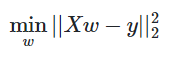
- The coefficient estimates for Ordinary Least Squares rely on the independence of the features.

In [23]:
fit(LinearRegression(), Xy[0])

coef_:  [0.5 0.5]
mse: 0.00


In [25]:
fit(LinearRegression(), Xy[1])

coef_:  [0.475 0.475]
mse: 0.00


## Ridge regression and classification
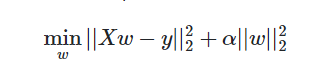


In [27]:
fit(Ridge(alpha=.5), Xy[0])

coef_:  [0.44444444 0.44444444]
mse: 0.01


In [28]:
fit(Ridge(alpha=.8), Xy[0])

coef_:  [0.41666667 0.41666667]
mse: 0.02


In [29]:
fit(Ridge(alpha=.2), Xy[0])

coef_:  [0.47619048 0.47619048]
mse: 0.00


## Lasso
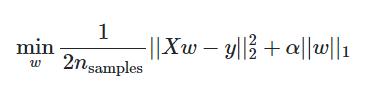

- It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent.

In [31]:
fit(Lasso(alpha=.5), Xy[0])

coef_:  [0.25 0.  ]
mse: 0.38


In [32]:
fit(Lasso(alpha=.2), Xy[0])

coef_:  [0.7 0. ]
mse: 0.06


## Elastic-Net
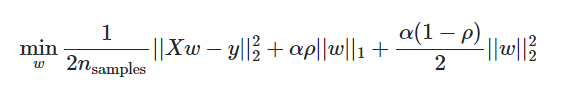

- ElasticNet is a linear regression model trained with both l1 and l2-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 
- Elastic-net is useful when there are multiple features that are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.


## Least Angle Regression

At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

- It is numerically efficient in contexts where the number of features is significantly greater than the number of samples.
- Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise.

In [35]:
fit(LassoLars(alpha=.5), Xy[0])

coef_:  [0.25 0.  ]
mse: 0.38


In [36]:
fit(Lasso(alpha=.2), Xy[0])

coef_:  [0.7 0. ]
mse: 0.06


## Bayesian Regression